### Understanding Dataset

Dataset includes house sale prices for King County in USA in period of May 2014 - May 2015.

Consist of columns:

- ida: notation for a house
- date: date house was sold
- price: price is prediction target
- bedrooms: number of bedrooms/house
- bathrooms: number of bathrooms/house
- sqft_living: square footage of the house
- sqft_lot: square footage of the lot
- floors: total floors (leves) in the house
- waterfront: access of view to a waterfront
- view: has been viewed
- condition: overall condition
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_abovesquare: footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: built year
- yr_renovated: year when house was renovated
- zipcode: zip
- lat: latitude coordinate
- long: longitude coordinate
- sqft_living15: living room area in 2015 (implies some renovations)
- sqft_lot15: lot size area in 2015 (implies some renovations)

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['image.cmap'] = 'viridis'
sns.set_theme()
sns.set_palette('viridis')

### Data Understanding

In [168]:
house_df = pd.read_csv('kc_house_data.csv', encoding='ISO-8859-1')

In [169]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [170]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [171]:
display(house_df.shape, house_df.columns)

(21613, 21)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [172]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [173]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [174]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [175]:
house_df.duplicated().sum()

0

### Visualize the Dataset

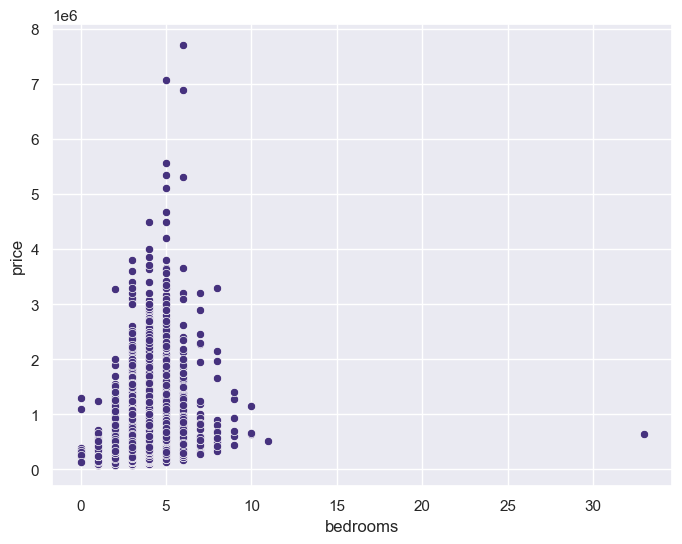

In [176]:
sns.scatterplot(x='bedrooms', y='price', data=house_df)
plt.show()

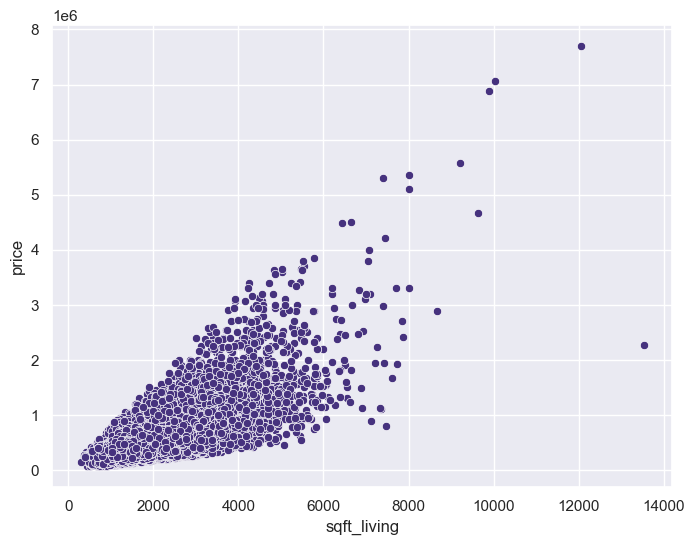

In [177]:
sns.scatterplot(x='sqft_living', y='price', data=house_df)
plt.show()

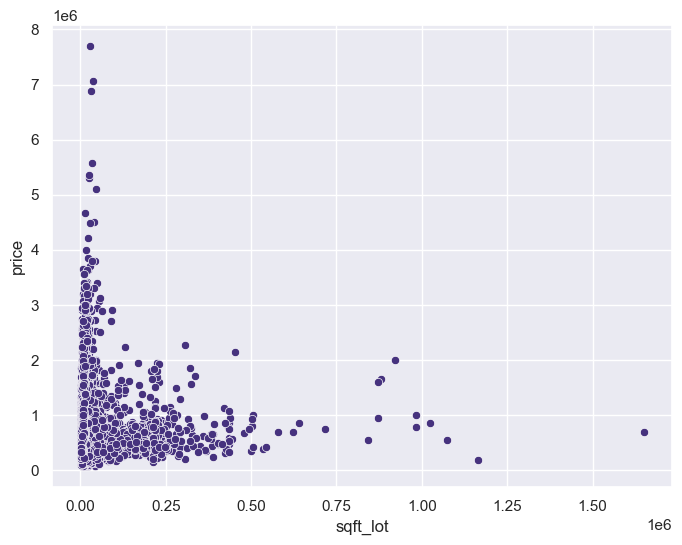

In [178]:
sns.scatterplot(x='sqft_lot', y='price', data=house_df)
plt.show()

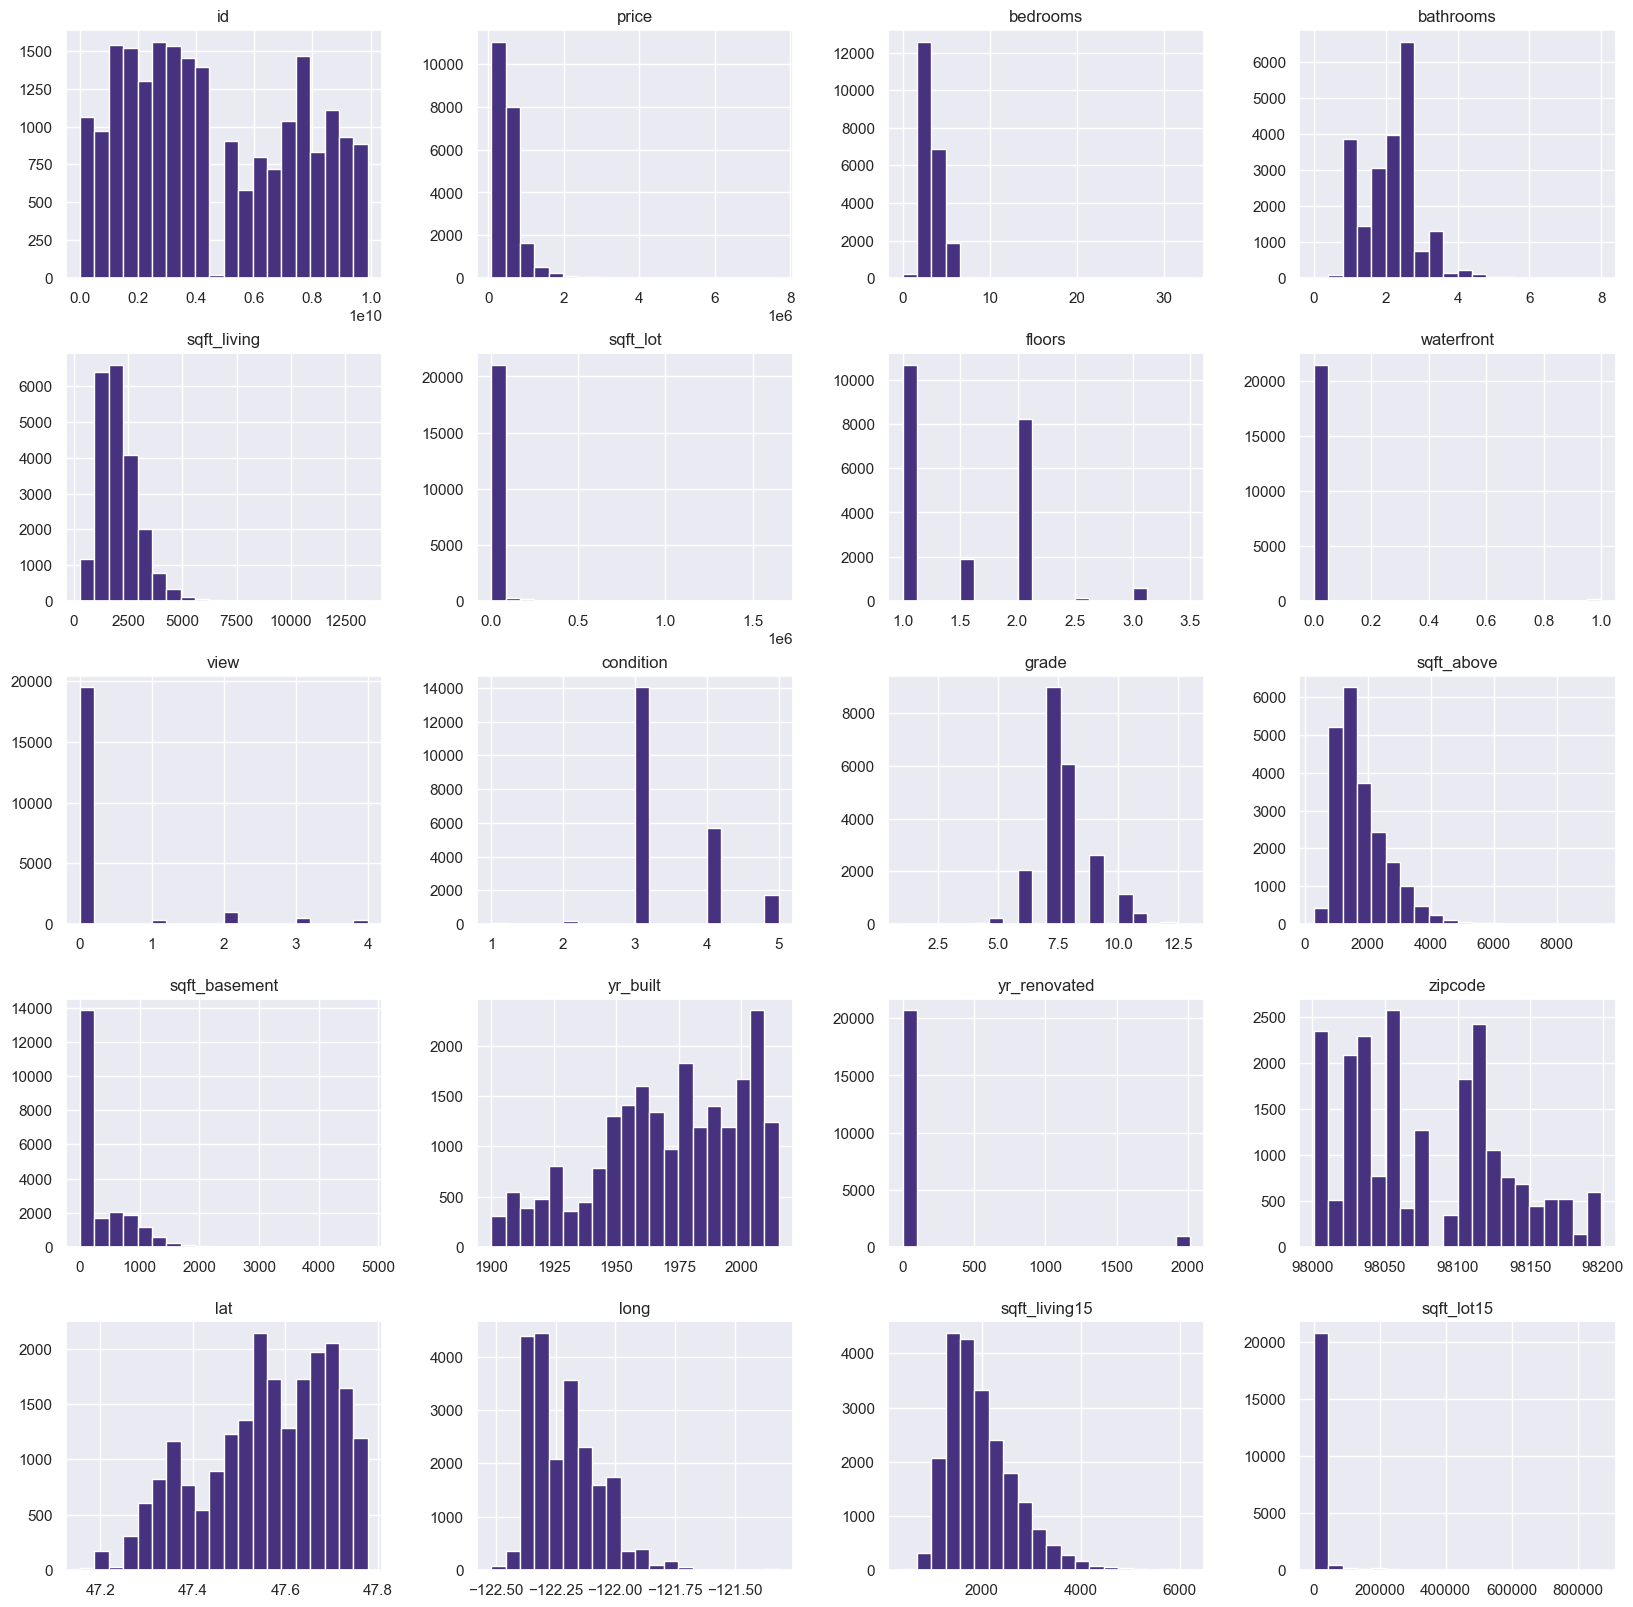

In [179]:
house_df.hist(bins=20, figsize=(20,20))
plt.show()

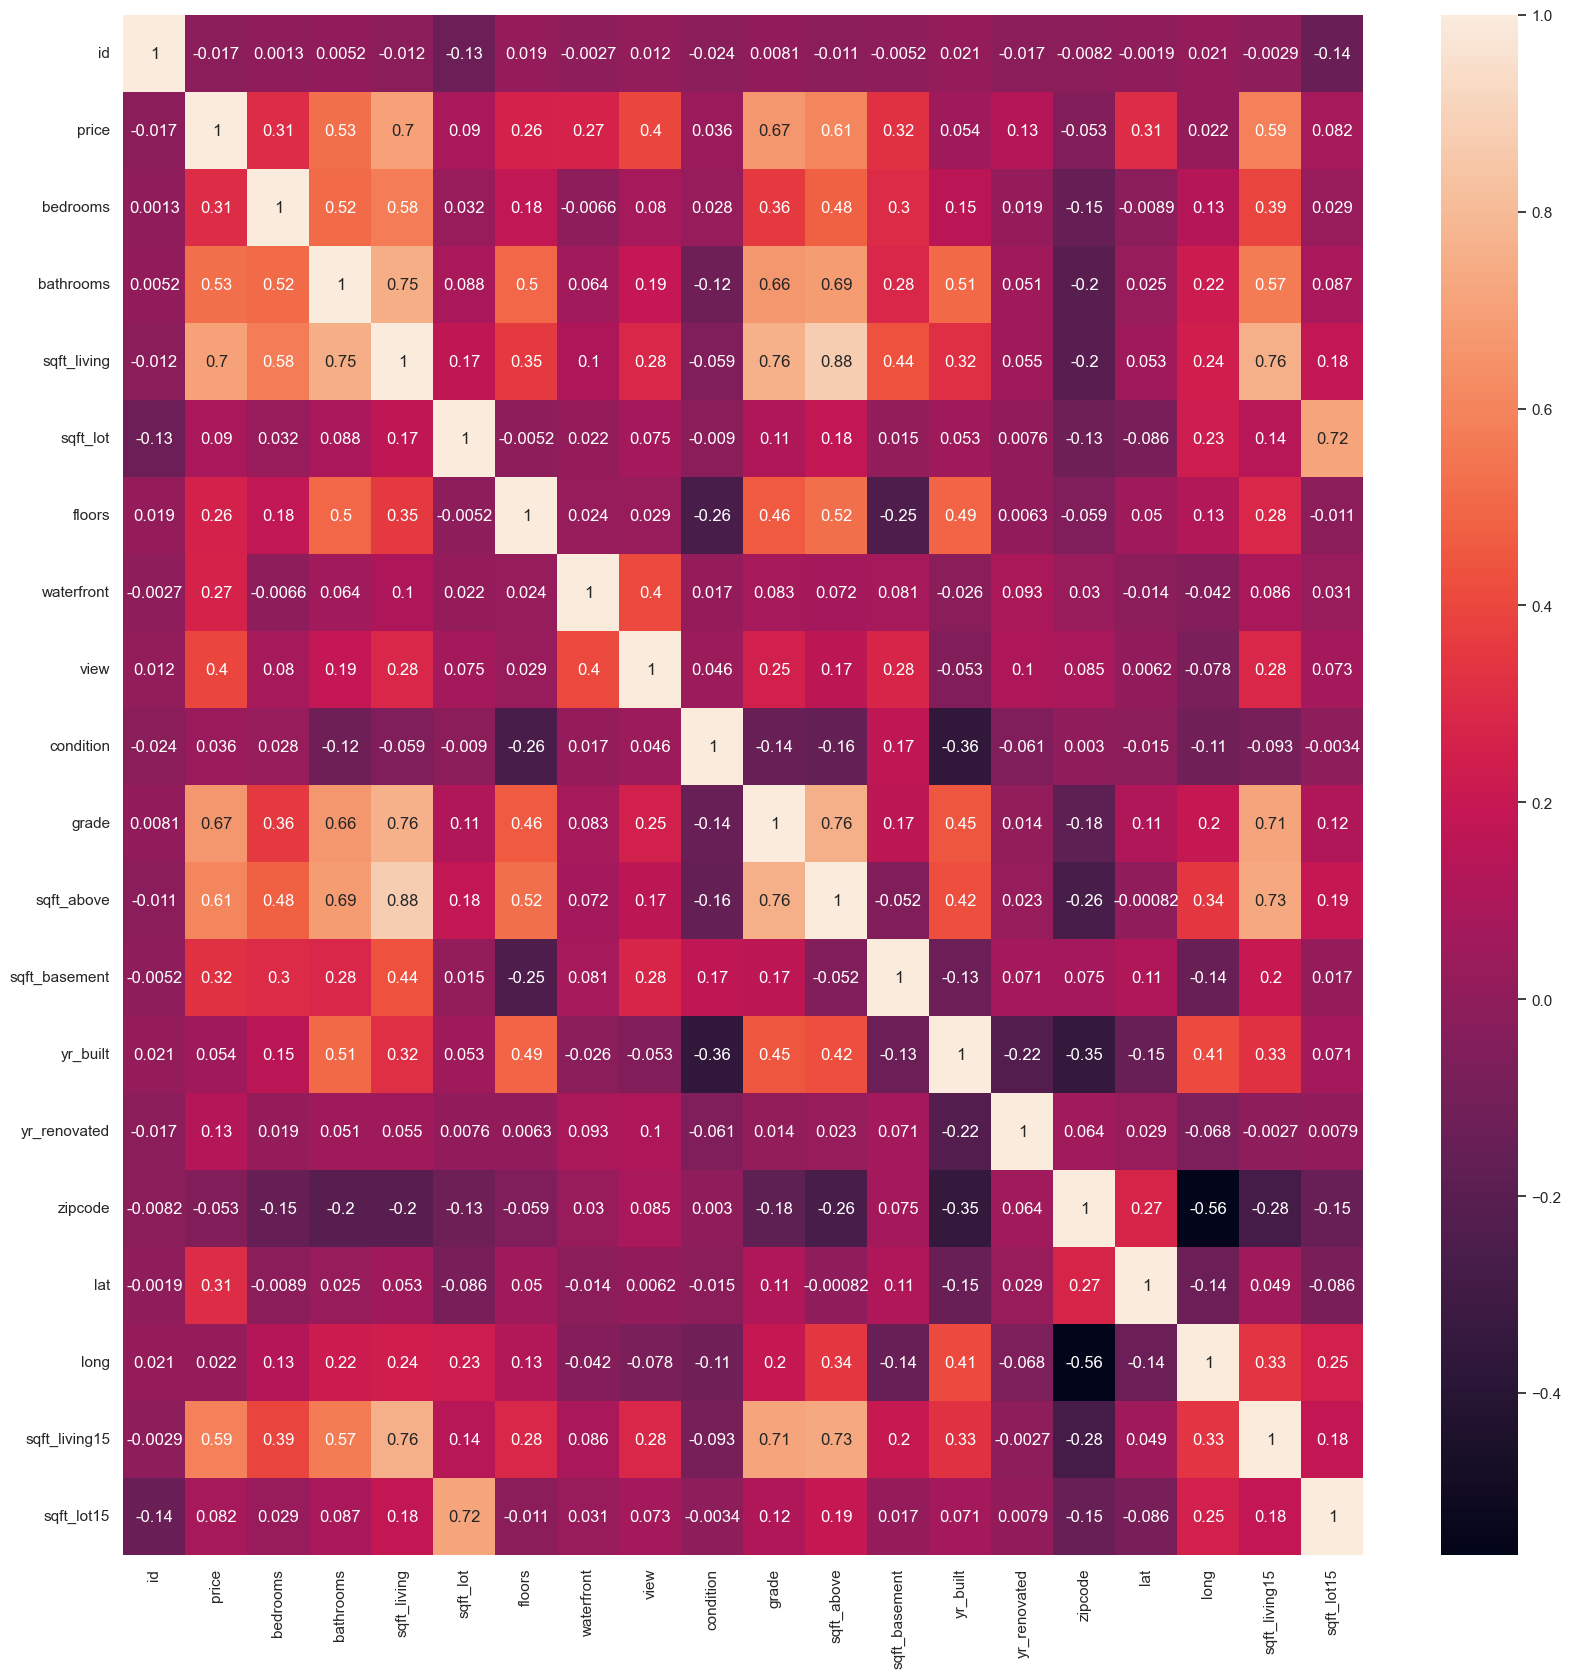

In [180]:
numeric_df = house_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

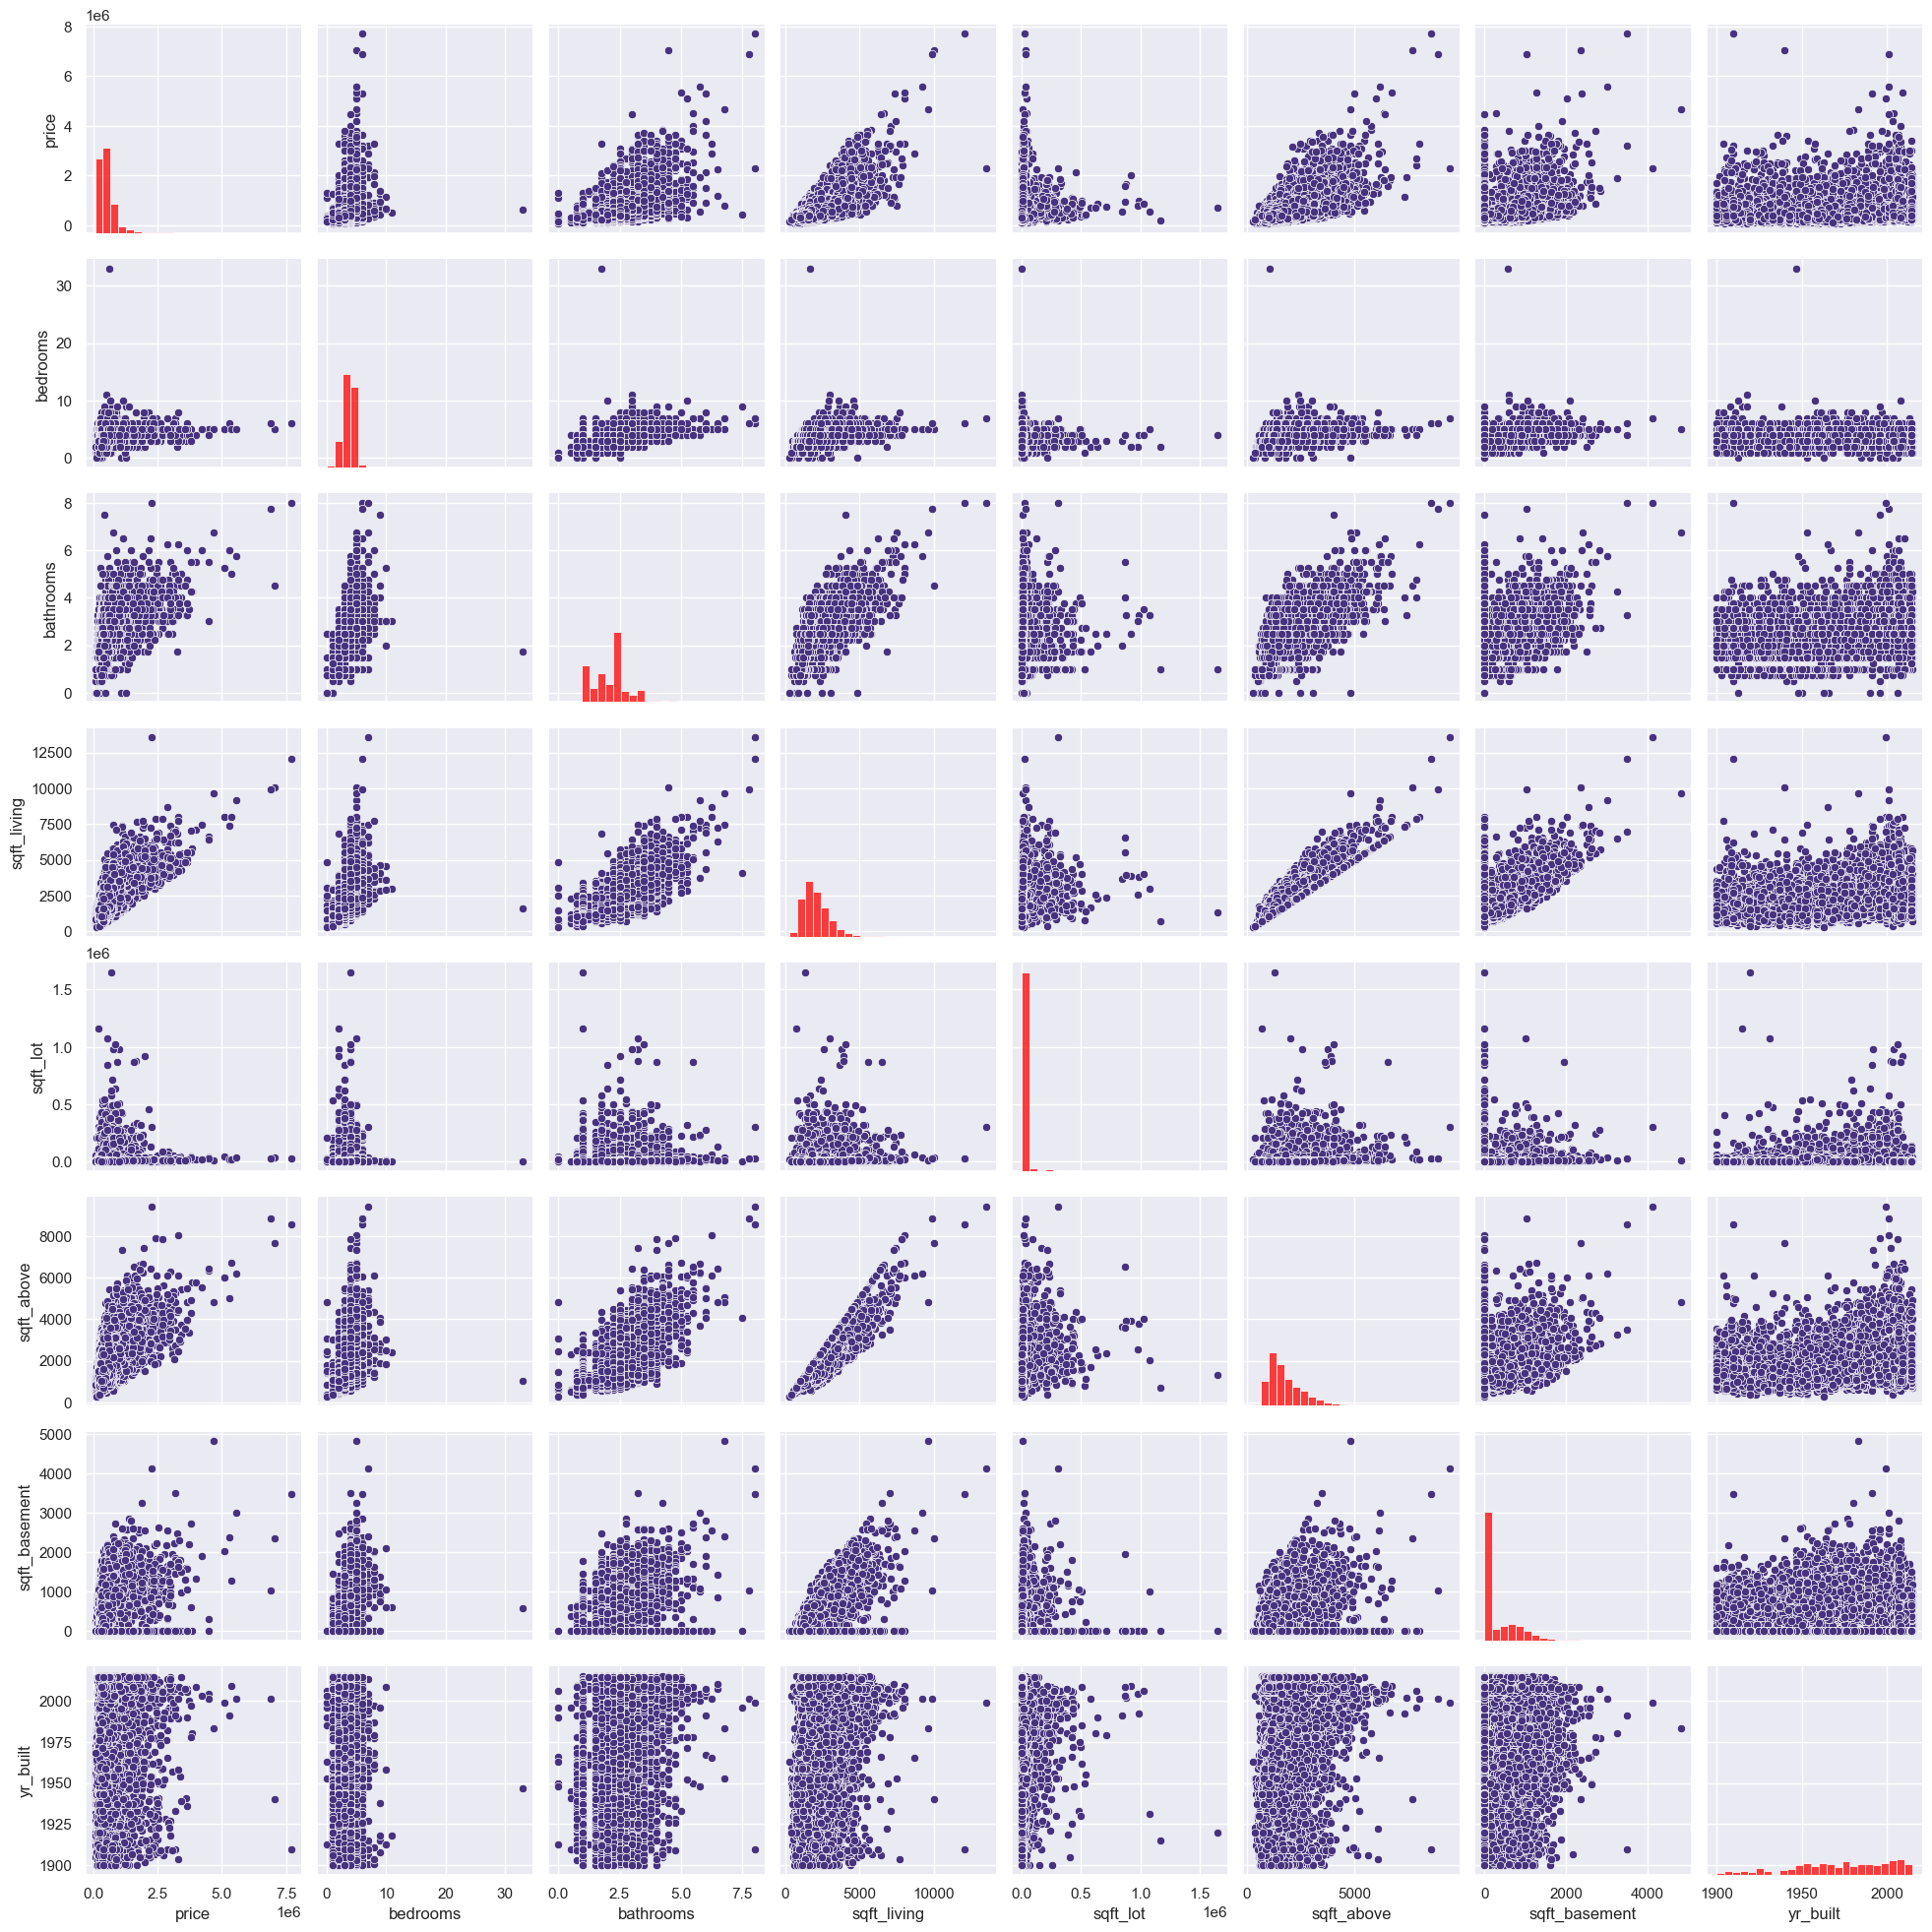

In [181]:
house_df_pairplot = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']]
sns.pairplot(house_df_pairplot, diag_kind='hist', diag_kws={'bins': 25, 'color': 'red'})
plt.show()

### Creating Train and Test Set

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = house_df[selected_features]
y = house_df['price']

In [184]:
display(X.head())
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [185]:
display(X.shape, y.shape)

(21613, 17)

(21613,)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [187]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16209, 17)

(16209,)

(5404, 17)

(5404,)

### Model Training

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [190]:
print('Linear Model Coefficient (m):', lr.coef_)
print('Linear Model Coefficient (b):', lr.intercept_)

Linear Model Coefficient (m): [-3.24417998e+04  4.48211159e+04  1.07276184e+02  9.32951430e-02
  1.27974434e+02  5.60621715e+05  5.14310742e+04  2.78489209e+04
  9.55205059e+04  7.06048048e+01  3.66713788e+01 -2.49744219e+03
  2.43344417e+01  5.57747863e+05 -1.02572373e+05  2.55887237e+01
 -3.51149059e-01]
Linear Model Coefficient (b): -34838552.91344259


### Model Evaluation

In [243]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer

In [192]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [193]:
display(y_pred_train, y_pred_test)

array([339998.48888052, 281336.75117484, 274693.18499631, ...,
       454702.25665143, -55528.23583908, 470950.71328697])

array([ 465254.91734712,  773996.13150035, 1213007.22545914, ...,
        411415.81902064, 1334872.06034822,  436682.92267584])

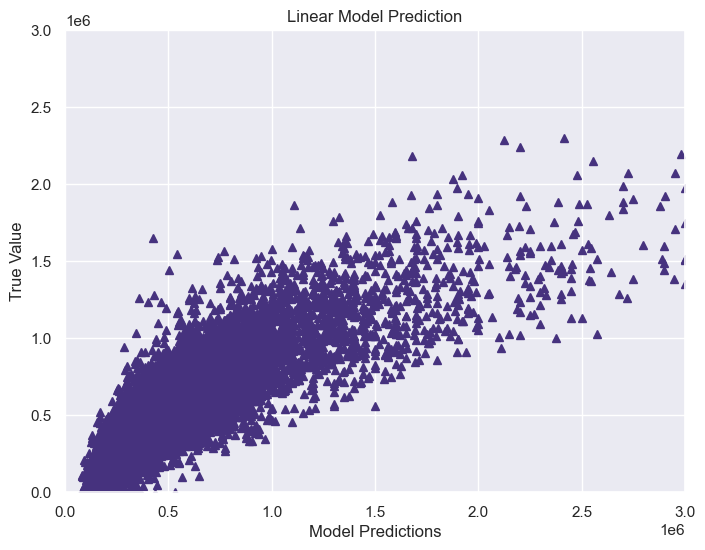

In [194]:
plt.plot(y_train, y_pred_train, '^')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.title('Linear Model Prediction')
plt.show()

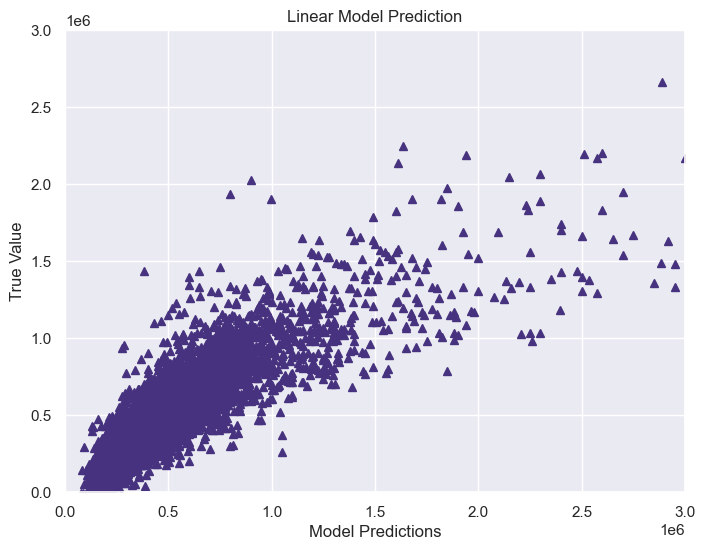

In [195]:
plt.plot(y_test, y_pred_test, '^')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.title('Linear Model Prediction')
plt.show()

In [196]:
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred_train)
n = len(y_train)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.6934513080427649
Mean Absolute Error: 125328.5769891455
Mean Squared Error: 39793287659.55021
Root Mean Squared Error: 199482.5497620035
Mean Absolute Percentage Error: 0.2543239901977203
Adjusted R-squared: 0.6931294423295122


In [197]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.699747980588826
Mean Absolute Error: 127067.87573597976
Mean Squared Error: 44913986280.65591
Root Mean Squared Error: 211929.20110417984
Mean Absolute Percentage Error: 0.2499908216341862
Adjusted R-squared: 0.6988002857633544


### Ridge and Lasso Regression

In [198]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [200]:
scaler = MinMaxScaler()
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train_reshape)
y_test_scaled = scaler.transform(y_test_reshape)

In [244]:
ridge_params = {'alpha': np.logspace(-4, 4, 100)}
lasso_params = {'alpha': np.logspace(-4, 2, 200)}
scoring = {'MAE': make_scorer(mean_absolute_error, greater_is_better=False), 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}

In [245]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring=scoring, refit='MSE', cv=5)
ridge_grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3....
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             refit='MSE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [246]:
best_ridge_alpha = ridge_grid.best_params_['alpha']
print(f"Best alpha for Ridge: {best_ridge_alpha}")

Best alpha for Ridge: 0.24770763559917114


In [271]:
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, scoring=scoring, refit='MSE', cv=5)
lasso_grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.07189132e-04, 1.14895100e-04, 1.23155060e-04,
       1.32008840e-04, 1.41499130e-04, 1.51671689e-04, 1.62575567e-04,
       1.74263339e-04, 1.86791360e-04, 2.00220037e-04, 2.14614120e-04,
       2.30043012e-04, 2.46581108e-04, 2.64308149e-04, 2.83309610e-04,
       3.03677112e-04, 3.25508860e-04, 3.48910121e-04, 3....
       3.52970730e+01, 3.78346262e+01, 4.05546074e+01, 4.34701316e+01,
       4.65952567e+01, 4.99450512e+01, 5.35356668e+01, 5.73844165e+01,
       6.15098579e+01, 6.59318827e+01, 7.06718127e+01, 7.57525026e+01,
       8.11984499e+01, 8.70359136e+01, 9.32930403e+01, 1.00000000e+02])},
             refit='MSE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [272]:
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f"Best alpha for Lasso: {best_lasso_alpha}")

Best alpha for Lasso: 0.0001


In [273]:
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train_scaled, y_train_scaled)
ridge_pred = ridge_best.predict(X_test_scaled)

In [274]:
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train_scaled, y_train_scaled)
lasso_pred = lasso_best.predict(X_test_scaled)

### Model Evaluation

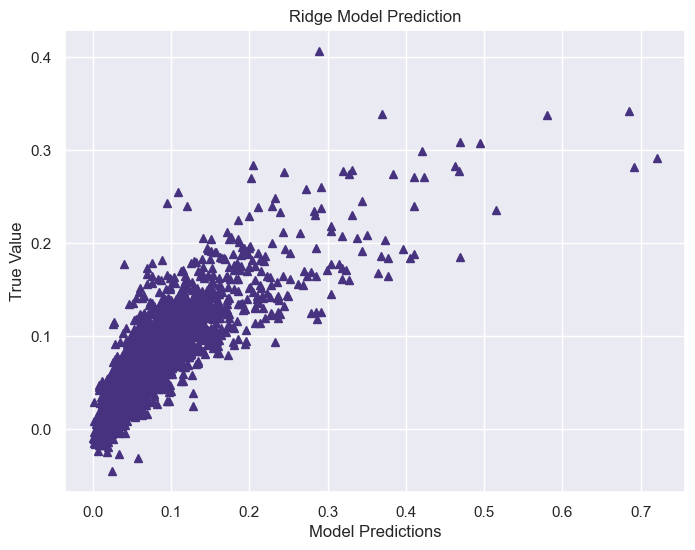

In [275]:
plt.plot(y_test_scaled, ridge_pred, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.title('Ridge Model Prediction')
plt.show()

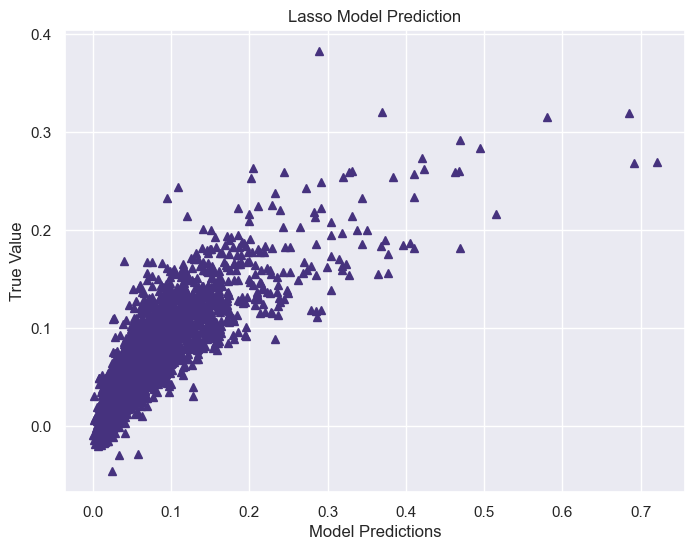

In [276]:
plt.plot(y_test_scaled, lasso_pred, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.title('Lasso Model Prediction')
plt.show()

In [277]:
r2 = r2_score(y_test_scaled, ridge_pred)
mae = mean_absolute_error(y_test_scaled, ridge_pred)
mse = mean_squared_error(y_test_scaled, ridge_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_scaled, ridge_pred)
n = len(y_test_scaled)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.699640302873966
Mean Absolute Error: 0.016659478813560672
Mean Squared Error: 0.0007727831191049958
Root Mean Squared Error: 0.027798976943495524
Mean Absolute Percentage Error: 0.33577586976822904
Adjusted R-squared: 0.6986922681819603


In [278]:
r2 = r2_score(y_test_scaled, lasso_pred)
mae = mean_absolute_error(y_test_scaled, lasso_pred)
mse = mean_squared_error(y_test_scaled, lasso_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_scaled, lasso_pred)
n = len(y_test_scaled)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.689258029156462
Mean Absolute Error: 0.01658063059251093
Mean Squared Error: 0.0007994952444120336
Root Mean Squared Error: 0.02827534693707636
Mean Absolute Percentage Error: 0.32967212482858393
Adjusted R-squared: 0.6882772245696925


In [279]:
ridge_pred_2d = ridge_pred.reshape(-1, 1)
lasso_pred_2d = lasso_pred.reshape(-1, 1)
ridge_pred_og = scaler.inverse_transform(ridge_pred_2d)
lasso_pred_og = scaler.inverse_transform(lasso_pred_2d)

In [280]:
r2 = r2_score(y_test, ridge_pred_og)
mae = mean_absolute_error(y_test, ridge_pred_og)
mse = mean_squared_error(y_test, ridge_pred_og)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, ridge_pred_og)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.699640302873966
Mean Absolute Error: 127028.52595340014
Mean Squared Error: 44930093534.21389
Root Mean Squared Error: 211967.19919415336
Mean Absolute Percentage Error: 0.24988623230704024
Adjusted R-squared: 0.6986922681819603


In [281]:
r2 = r2_score(y_test, lasso_pred_og)
mae = mean_absolute_error(y_test, lasso_pred_og)
mse = mean_squared_error(y_test, lasso_pred_og)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, lasso_pred_og)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.6892580291564621
Mean Absolute Error: 126427.30826789585
Mean Squared Error: 46483153194.64338
Root Mean Squared Error: 215599.52039520722
Mean Absolute Percentage Error: 0.2459433648265411
Adjusted R-squared: 0.6882772245696926
